In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def load_data():
    url = """https://www.kaggle.com/c/demand-forecasting-kernels-only/data?select=train.csv"""     
    
    return pd.read_csv("/Users/ayyaz/DataScience/SaleDataToPredict.csv")

def monthly_sales(data):    
    data = data.copy()     
    # Drop the day indicator from the date column    
    data.date = data.date.apply(lambda x: str(x)[:-3])     
    # Sum sales per month    
    data = data.groupby('date')['sales'].sum().reset_index()    
    data.date = pd.to_datetime(data.date)  
    #data.to_csv('../data/monthly_data.csv')     
    return data

data = load_data()
data = monthly_sales(data)
data.to_csv('/Users/ayyaz/Downloads/monthly_data.csv')  

In [4]:
data['sales_diff'] = data.sales.diff()    
data = data.dropna() 

In [5]:
data.head()

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0


In [6]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Sales')
    
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    sns.lineplot((second.date + datetime.timedelta(6*365/12)), y_col, data=second, ax=ax, color='red', label='Mean Sales')   
    
    ax.set(xlabel = "Date",
           ylabel = "Sales",
           title = title)
    
    sns.despine()

In [7]:
import datetime

import statsmodels.tsa.api as smt

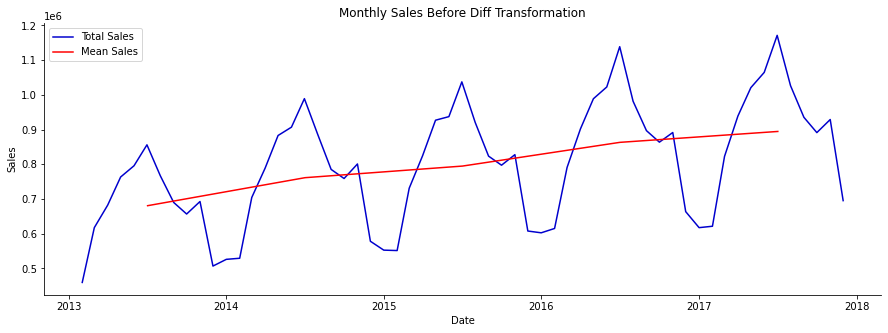

In [8]:
time_plot(data, 'date', 'sales', 'Monthly Sales Before Diff Transformation')

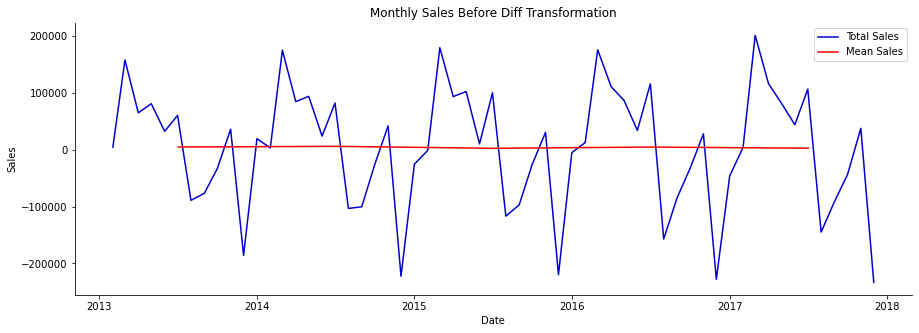

In [9]:
time_plot(data, 'date', 'sales_diff', 'Monthly Sales Before Diff Transformation')

In [10]:
field_name = 'lag_' + str(1)
data[field_name] = data['sales_diff'].shift(1)
data

,date,sales,sales_diff,lag_1
1,2013-02-01,459417,4513.0,NaN
2,2013-03-01,617382,157965.0,4513.0
3,2013-04-01,682274,64892.0,157965.0
4,2013-05-01,763242,80968.0,64892.0
5,2013-06-01,795597,32355.0,80968.0
6,2013-07-01,855922,60325.0,32355.0
7,2013-08-01,766761,-89161.0,60325.0
8,2013-09-01,689907,-76854.0,-89161.0
9,2013-10-01,656587,-33320.0,-76854.0
10,2013-11-01,692643,36056.0,-33320.0


In [11]:
for inc in range(2,13):
    field_name = 'lag_' + str(inc)
    data[field_name] = data['sales_diff'].shift(inc)

In [12]:
data = data.dropna().reset_index(drop=True)

In [13]:
data

,date,sales,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2014-02-01,529117,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,2014-03-01,704301,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,2014-04-01,788914,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,2014-05-01,882877,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,2014-06-01,906842,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,2014-07-01,989010,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,2014-08-01,885596,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,2014-09-01,785124,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,2014-10-01,758883,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,2014-11-01,800783,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [18]:
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='sales_diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12', data=data)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.9795722233296558


In [19]:
from sklearn.preprocessing import MinMaxScaler
df_model = data.drop(['sales','date'],axis=1)

train_set, test_set = df_model[0:-6].values, df_model[-6:].values

In [22]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [23]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [27]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [31]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
41/41 [==============================] - 1s 1ms/step - loss: 0.2144 
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1677
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1543
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1423
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 6/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1203
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1113
Epoch 8/100
41/41 [==============================] - 0s 825us/step - loss: 0.1035
Epoch 9/100
41/41 [==============================] - 0s 914us/step - loss: 0.0969
Epoch 10/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0910
Epoch 11/100
41/41 [==============================] - 0s 848us/step - loss: 0.0856
Epoch 12/100
41/41 [==============================] - 0s 868us/step - loss: 0.0807
Epoch 13/100
41/41 [========

41/41 [==============================] - 0s 815us/step - loss: 0.0027


In [32]:
y_pred = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1 = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1

In [38]:
import numpy as np
#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)


[[ 0.60880613  0.26695937  0.44344626  0.60355899  1.10628178  0.13866328
  -0.10745675 -1.02635392  0.24535439 -0.05787474 -0.31370458 -0.67437352
   0.68397168]]
[[-0.63028651  0.55964922  0.26695937  0.44344626  0.68877355  1.10628178
   0.13866328 -0.12204966 -1.02635392  0.24535439 -0.05787474 -0.31370458
  -0.67437352]]
[[-0.42051736 -0.61313659  0.55964922  0.26695937  0.52015228  0.68877355
   1.10628178  0.12731349 -0.12204966 -1.02635392  0.24535439 -0.05787474
  -0.31370458]]
[[-0.06173714 -0.36228353 -0.61313659  0.55964922  0.33428672  0.52015228
   0.68877355  1.10768225  0.12731349 -0.12204966 -1.02635392  0.24535439
  -0.05787474]]
[[ 0.20439884 -0.14316792 -0.36228353 -0.61313659  0.64253037  0.33428672
   0.52015228  0.68467253  1.10768225  0.12731349 -0.12204966 -1.02635392
   0.24535439]]
[[-1.03562093  0.23779333 -0.14316792 -0.36228353 -0.59257833  0.64253037
   0.33428672  0.51382935  0.68467253  1.10768225  0.12731349 -0.12204966
  -1.02635392]]


In [41]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(data[-7:].date)
act_sales = list(data[-7:].sales)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

In [42]:
df_result

,pred_value,date
0,1181945,2017-07-01
1,1022721,2017-08-01
2,922762,2017-09-01
3,908640,2017-10-01
4,921668,2017-11-01
5,693153,2017-12-01


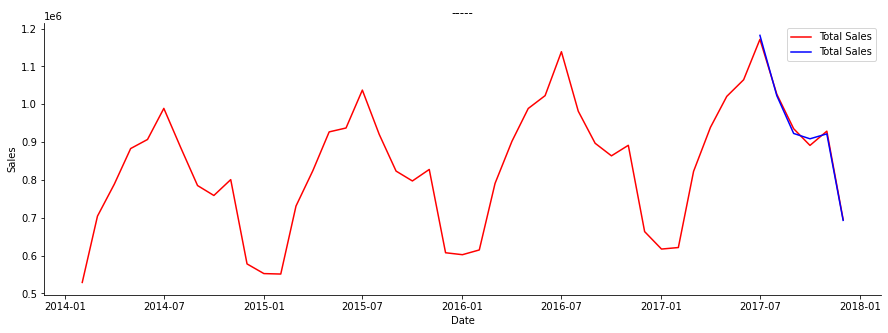

In [55]:
df_result.columns = ["sales","date"]

fig, ax = plt.subplots(figsize=(15,5))
x_col, y_col = "date" ,"sales"
title = "-----"

sns.lineplot(x_col, y_col, data=data, ax=ax, color='Red', label='Original')
second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
second.date = pd.to_datetime(second.date, format='%Y')

sns.lineplot(x_col, y_col, data=df_result, ax=ax, color='Blue', label='Predication')
second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
second.date = pd.to_datetime(second.date, format='%Y')


ax.set(xlabel = "Date",
       ylabel = "Sales",
       title = title)

sns.despine()